In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV

In [15]:
 hobbyplz= pd.read_csv('/content/Hobby_Data.csv')

In [ ]:
hobbyplz.head()

,Olympiad_Participation,Scholarship,School,Fav_sub,Projects,Grasp_pow,Time_sprt,Medals,Career_sprt,Act_sprt,Fant_arts,Won_arts,Time_art,Predicted Hobby
0,Yes,Yes,Yes,Mathematics,Yes,5,1,Yes,No,No,No,Maybe,3,Academics
1,Yes,Yes,Yes,Mathematics,Yes,3,2,No,No,No,No,No,1,Academics
2,Yes,Yes,Yes,Science,Yes,5,1,Yes,No,No,No,No,1,Academics
3,Yes,Yes,Yes,Mathematics,Yes,5,1,Yes,No,No,No,Maybe,3,Academics
4,Yes,Yes,Yes,Science,Yes,5,3,No,No,No,No,No,2,Academics


In [17]:
hobbyplz.describe()

,Grasp_pow,Time_sprt,Time_art
count,1601.000000,1601.000000,1601.000000
mean,3.480325,3.033729,2.234229
std,1.006737,1.347725,1.266186
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,1.000000
50%,3.000000,3.000000,2.000000
75%,4.000000,4.000000,3.000000
max,6.000000,6.000000,6.000000


In [18]:
hobbyplz["Predicted Hobby"].unique()

array(['Academics', 'Arts', 'Sports'], dtype=object)

In [19]:
hobbyplz.isna().sum()

,0
Olympiad_Participation,0
Scholarship,0
School,0
Fav_sub,0
Projects,0
Grasp_pow,0
Time_sprt,0
Medals,0
Career_sprt,0
Act_sprt,0


In [20]:
hobbyplz_int=hobbyplz.select_dtypes(include=["int64"])
hobbyplz_obj=hobbyplz.select_dtypes(include=["object"]).columns
hobbyplz_obj

Index(['Olympiad_Participation', 'Scholarship', 'School', 'Fav_sub',
       'Projects', 'Medals', 'Career_sprt', 'Act_sprt', 'Fant_arts',
       'Won_arts', 'Predicted Hobby'],
      dtype='object')

In [21]:
encoder=LabelEncoder()
for col in hobbyplz_obj:
    hobbyplz[col] = encoder.fit_transform(hobbyplz[col])
    labels = {i: label for i, label in enumerate(encoder.classes_)}
    print(col,labels)

Olympiad_Participation {0: 'No', 1: 'Yes'}
Scholarship {0: 'No', 1: 'Yes'}
School {0: 'No', 1: 'Yes'}
Fav_sub {0: 'Any language', 1: 'History/Geography', 2: 'Mathematics', 3: 'Science'}
Projects {0: 'No', 1: 'Yes'}
Medals {0: 'No', 1: 'Yes'}
Career_sprt {0: 'No', 1: 'Yes'}
Act_sprt {0: 'No', 1: 'Yes'}
Fant_arts {0: 'No', 1: 'Yes'}
Won_arts {0: 'Maybe', 1: 'No', 2: 'Yes'}
Predicted Hobby {0: 'Academics', 1: 'Arts', 2: 'Sports'}


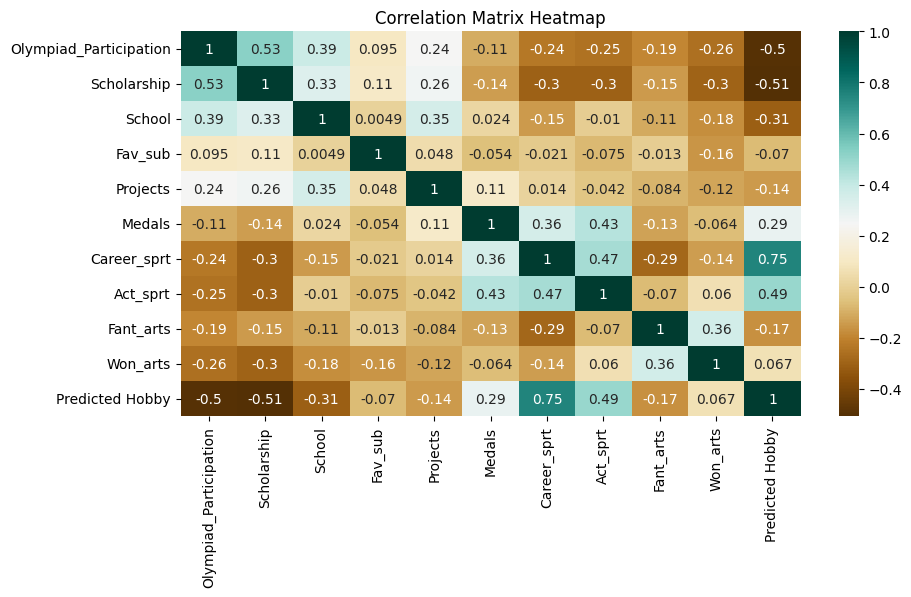

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 5))

# Calculate the correlation matrix
c = hobbyplz[["Olympiad_Participation", 'Scholarship', 'School', 'Fav_sub',
       'Projects', 'Medals', 'Career_sprt', 'Act_sprt', 'Fant_arts',
       'Won_arts', "Predicted Hobby"]].corr()

# Create the heatmap
sns.heatmap(c, cmap="BrBG", annot=True)

# Show the plot
plt.title("Correlation Matrix Heatmap")
plt.show()

In [23]:
X=hobbyplz.drop(columns=["Predicted Hobby"])
X.columns
y=hobbyplz["Predicted Hobby"]
import plotly.express as px
for column in X:
    fig = px.density_heatmap(hobbyplz, x=column, y=y, template='ggplot2')
    fig.update_layout(
        title=f"Density Heatmap of {column}",
        height=300,
    )
    fig.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression:
Accuracy: 0.9097
Precision: 0.9097
Recall: 0.9097
F1 Score: 0.9091
ROC AUC: 0.9815


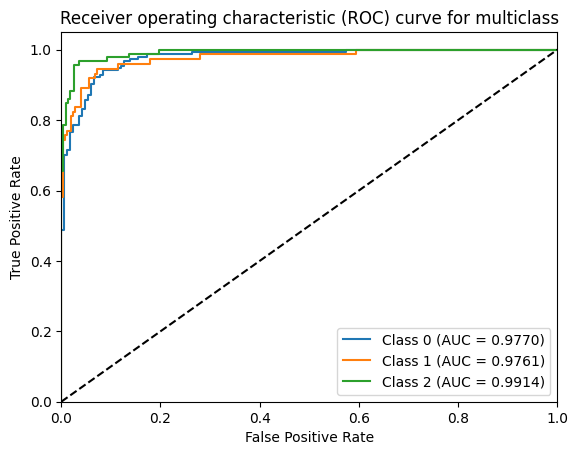

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate Logistic Regression
accuracy = accuracy_score(y_test, y_pred)

# Use 'weighted' average for multiclass precision
precision = precision_score(y_test, y_pred, average='weighted')

# Use 'weighted' average for multiclass recall
recall = recall_score(y_test, y_pred, average='weighted')

# Use 'weighted' average for multiclass f1-score
f1 = f1_score(y_test, y_pred, average='weighted')

roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr') # For multiclass ROC AUC

# Print evaluation metrics
print("Logistic Regression:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Get the number of classes
n_classes = len(np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, log_reg.predict_proba(X_test)[:, i]) # For multiclass ROC AUC

# Plot ROC curves for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve for multiclass')
plt.legend(loc="lower right")
plt.show()



Decision Tree:
Accuracy: 0.8754
Precision: 0.8767
Recall: 0.8754
F1 Score: 0.8758
ROC AUC: 0.9059


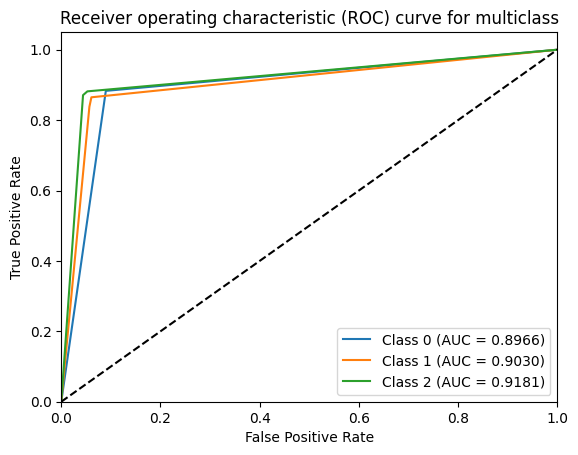

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Initialize Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate Decision Tree
accuracy = accuracy_score(y_test, y_pred)
# Change 'average' to 'weighted' for multiclass classification
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# For multiclass ROC AUC, use 'ovr' or 'ovo'
roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test), multi_class='ovr')

# Print evaluation metrics
print("Decision Tree:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Get the number of classes
n_classes = len(np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, decision_tree.predict_proba(X_test)[:, i]) # For multiclass ROC AUC

# Plot ROC curves for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve for multiclass')
plt.legend(loc="lower right")
plt.show()

Random Forest:
Accuracy: 0.9315
Precision: 0.9321
Recall: 0.9315
F1 Score: 0.9313
ROC AUC: 0.9916


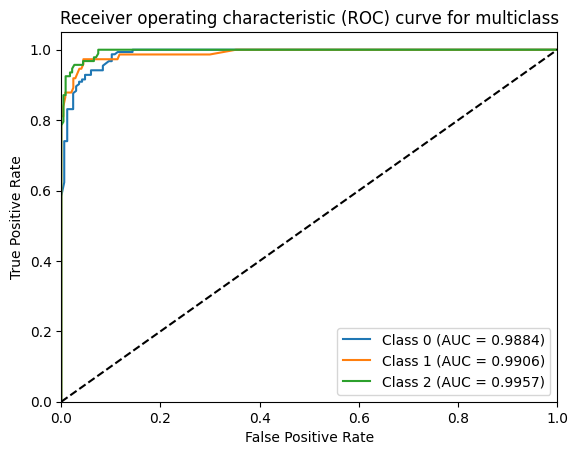

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate Random Forest
accuracy = accuracy_score(y_test, y_pred)
# Use 'weighted' average for multiclass precision
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# For multiclass ROC AUC, use 'ovr' (one-vs-rest)
roc_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test), multi_class='ovr')

# Print evaluation metrics
print("Random Forest:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Get the number of classes
n_classes = len(np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, random_forest.predict_proba(X_test)[:, i]) # For multiclass ROC AUC

# Plot ROC curves for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve for multiclass')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:36:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




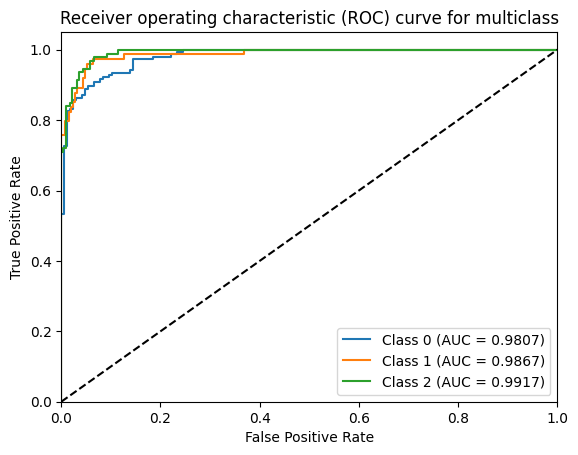

Random Forest:
Accuracy: 0.9065420560747663
Precision: 0.909237958303379
Recall: 0.9065420560747663
F1 Score: 0.9064629884403119
ROC AUC: {0: 0.9806750136091452, 1: 0.9866506182295656, 2: 0.9917468402188266}


In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate XGBoost
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Set average='weighted' for multiclass recall
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# Adjust ROC AUC calculation for multiclass
roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovr')

# Plot ROC Curve
# Get the number of classes
n_classes = len(np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, xgb.predict_proba(X_test)[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, xgb.predict_proba(X_test)[:, i]) # For multiclass ROC AUC

# Plot ROC curves for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve for multiclass')
plt.legend(loc="lower right")
plt.show()
print("Random Forest:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall:}")
print(f"F1 Score: {f1:}")
print(f"ROC AUC: {roc_auc:}")

                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.909700   0.909700  0.909700  0.909100  0.981500
1        Decision Tree  0.875400   0.876700  0.875400  0.875800  0.905900
2        Random Forest  0.931500   0.932100  0.931500  0.931300  0.991600
3              XGBoost  0.906542   0.909238  0.906542  0.906463  0.980675


<ipython-input-29-2e80ccf52d19>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




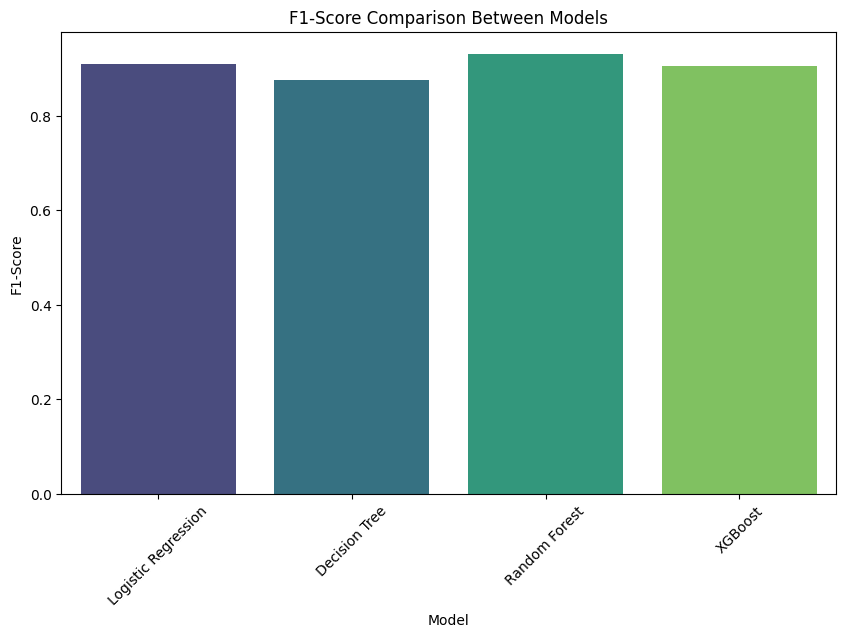

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score

# Assuming these are the models you've already trained
# Replace the values below with your actual results

model_performance = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.9097,  0.8754, 0.9315 , 0.9065420560747663],
    'Precision': [0.9097, 0.8767,0.9321, 0.909237958303379],
    'Recall': [0.9097, 0.8754,0.9315, 0.9065420560747663],
    'F1-Score': [0.9091,  0.8758,0.9313,0.9064629884403119],
    'ROC AUC': [ 0.9815,0.9059,0.9916,0.9806750136091452]

}

# Convert dictionary to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the table
print(performance_df)

# Plot F1-Score Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', data=performance_df, palette='viridis')
plt.title('F1-Score Comparison Between Models')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.show()

In [31]:
xgb_params = [{
    'n_estimators': range(10, 50, 10),
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': range(3,21,2)
}]

xgb = XGBClassifier()
xgb_grid_search = GridSearchCV(xgb, xgb_params, scoring='f1', cv=5, verbose=False, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.5, 1.0],
                          'max_depth': range(3, 21, 2),
                          'n_estimators': range(10, 50, 10)}],
             scoring='f1', verbose=False)

In [33]:
best_xgb_params = xgb_grid_search.best_params_  # Changed lr_grid_search to xgb_grid_search
print(best_xgb_params)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]

